### Use Linear Regression and nonlinear feature transformations to predict Portland home prices

Create your own notebook to try to predict home prices in Portland.
You can use this notebook as a guide to help you understand some

1. Make sure you remove any "tax" and "price" columns from the X inputs (features) for your model. Is there a way to do this without reading all the column names and understanding what the columns mean? What would you do if all the column names were numbers like 0, 1, ... 100 ?
2. Create a list that you can append data structures that contain information about how you did your experiments (hyperparameters). What is good data structure for storing named values, where the name can be any string you like?
3. After each experiment, use the `jsonlines` package to *append* you latest experiment dictionary as a single json line. Why is it a bad idea to use the `json` package to append new lines to your file? How do you open a file in *append* mode?
4. After each experiment display all your experiments as a dataframe sorted by "RMSE."  What are the units of your RMSE values? If your model had a RMSE of 1000, how bad or good is that model?  What can you say to someone to describe to them how good your model is? Can you compute a percent error from the raw RMSE? Can you compute a percent accuracy from the raw RMSE?
5. You can't fit a model to data that contains `NaN`s ("not a number"s). Your models (and computers in general) only work with numbers. So in your first experiment fill the `NaN`s (missing values) with the mean values for those features.
6. In another experiment create some new features that detect whether a value was NA *before* you filled it with thje mean value for that column. Did the `"_isna"` features improve your accuracy (reduce RMSE) or make it worse (increase RMSE)?
7. In some more experiments fill with zeros, ones, median, min, and max (instead of mean) after you have created the `"_isna"` features. Which one works best?
8. For your best experiment, train a model again, and plot a scatterplot of the residuals (price error) relative to a numberical value feature, such as "LivingArea", "parking", "number of floors", or "number of bedrooms". If your model is working well, what should you expect to see in this plot?
9. Plot a histogram of the price prediction errors on each home. Make sure you give it enough `bins` to produce a useful histogram. What shape do you expect to see here if your model is working well? 
10. Engineer a threshold feature on square footage based on a residual plot (scatterplot of the price error vs square footage). Choose a random value at first, like 100 sq ft, for your threshold value. Move it around and see if you can find a good threshold value that improves your accuracy. What kinds of "shapes" in your residual scatter plot can help you find good places for threshold features? 
11. Engineer any other nonlinear features that you think might improve the accuracy (any nonlinear transformation of a column). Name at least 3 different nonlinear transformations (mathematical functions) that you want to try to use to engineer features for this dataset.
12. Each time you train a new model create that sorted table of "hyperparameters" and RMSE so that you can see whether what you did helped or hurt your model. Why does it seem that the more features/columns you have, the lower the RMSE?  Is it possible to achieve 0.0 RMSE? How many features do you think you would need?
13. See if you can find that $25M home in portland and find a way to detect it with your threshold features on things like square footage, parking, or number of stories etc.
14. Set a random seed in numpy so that whenever you rerun your notebook it will always create the same samples and shuffles of data. Create a test set of homes that has at least 1000 homes that are not in your training set that you fit the model to. Do NOT use `train_test_split()` to create your dataset splits. Instead use either `.sample()` or `np.random.rand()`. And check to see that none of the homes in your test set exist in your training set. How good is your best model at predicting prices for the homes in your test set? Does your model perform better or worse on your test set.
15. 

<!-- TODO: separate these into separate cells so that the questions are separate from the instructions and the user can reveal "hints" using `python` or a chatbot, if needed -->

In [1]:
import numpy as np
import pandas as pd
import sklearn

pd.options.display.max_columns = 10000
np.random.seed(20191124)
experiments = []

ModuleNotFoundError: No module named 'sklearn'

In [2]:
dfall = pd.read_csv('portland_housing.csv.gz')
dfall

/tmp/ipykernel_9522/2049606831.py:1: DtypeWarning: Columns (20,50,161,200) have mixed types. Specify dtype option on import or set low_memory=False.
  dfall = pd.read_csv('portland_housing.csv.gz')


abbreviatedAddress address/city  address/zipcode  bathrooms  \
0      2860 NE Blossom Hill Rd     Fairview            97024        3.0   
1        20386 NE Mackenzie Ln     Fairview            97024        3.0   
2              1121 SW 10th Dr      Gresham            97080        3.0   
3           19309 NE Glisan St     Portland            97230        1.0   
4             25-65 NW 20th St      Gresham            97030        3.0   
...                        ...          ...              ...        ...   
25726         7600 SW Erica Pl    Beaverton            97008        2.0   
25727       7275 SW Palmer Way    Beaverton            97007        3.0   
25728    (Undisclosed Address)    Beaverton            97008        2.0   
25729         7250 SW 70th Ave     Portland            97223        2.0   
25730         6655 SW 67th Ave     Portland            97223        3.0   

       bedrooms                          brokerageName      dateSold  \
0           3.0                                    NaN  1.621560e+12   
1           3.0    Harcourts Real Estate Network Group  1.619140e+12   
2           4.0               ERA Freeman & Associates  1.622760e+12   
3           3.0           Premiere Property Group, LLC  1.622760e+12   
4           6.0                                    NaN  1.622510e+12   
...         ...                                    ...           ...   
25726       3.0  Keller Williams Realty Portland Elite  1.595290e+12   
25727       4.0   Keller Williams Realty Professionals  1.595200e+12   
25728       2.0                 Opendoor Brokerage LLC  1.622760e+12   
25729       3.0                                    NaN  1.599000e+12   
25730       4.0                 iPropertiesNW.com, LLC  1.598310e+12   

       daysOnZillow                                        description  \
0              25.0  2860 NE Blossom Hill Rd, Fairview, OR 97024 is...   
1              53.0  Cute as a button 3bed/2.5bath home with brand ...   
2              11.0  What a wonderful large home at end of quiet cu...   
3              11.0                                                NaN   
4              14.0  25-65 NW 20th St, Gresham, OR 97030 is a apart...   
...             ...                                                ...   
25726         363.0  Perfectly nestled back from the Cul-de-sac roa...   
25727         364.0  Contemporary Dream Home Backing To Lowami Hart...   
25728          45.0  This Beaverton two-story cul-de-sac home offer...   
25729         320.0  Close-in yet feels like the country. Large lot...   
25730         328.0  Gorgeous lot backs to Hideaway Park and is ove...   

       favoriteCount     homeStatus       homeType  lastSoldPrice   latitude  \
0                NaN  RECENTLY_SOLD      TOWNHOUSE         315400  45.543571   
1                NaN  RECENTLY_SOLD  SINGLE_FAMILY         400000  45.547585   
2                NaN  RECENTLY_SOLD  SINGLE_FAMILY         512000  45.488228   
3                1.0  RECENTLY_SOLD  SINGLE_FAMILY         348000  45.526634   
4                NaN  RECENTLY_SOLD      APARTMENT         510000  45.511238   
...              ...            ...            ...            ...        ...   
25726            NaN  RECENTLY_SOLD  SINGLE_FAMILY         415000  45.465111   
25727            1.0  RECENTLY_SOLD  SINGLE_FAMILY         615000  45.467197   
25728            NaN  RECENTLY_SOLD      TOWNHOUSE         380000        NaN   
25729            NaN  RECENTLY_SOLD  SINGLE_FAMILY          57997  45.467545   
25730            NaN  RECENTLY_SOLD  SINGLE_FAMILY         585000  45.471767   

       livingArea   longitude  lotSize  pageViewCount postingContact/name  \
0          1806.0 -122.441765   1555.0           47.0                 NaN   
1          1518.0 -122.453224   3484.0            4.0        Julie Murray   
2          2724.0 -122.444420   9583.0          153.0      Michelle Haage   
3          1217.0 -122.464088  13939.0           32.0       Greg Whistler   
4          

In [3]:
numsamples = 10000
df = dfall.sample(numsamples)
sample_rownums = df.index.values
df

abbreviatedAddress address/city  address/zipcode  bathrooms  bedrooms  \
10577     5741 SE 71st Ave     Portland            97206        1.0       3.0   
19636     610 Stonehill St    Gladstone            97027        2.0       3.0   
19619     10477 SE 53rd Pl     Portland            97222        3.0       3.0   
11190   9916 SE Reedway St     Portland            97266        1.0       3.0   
20652   17375 SW 128th Ave       Tigard            97224        3.0       4.0   
...                    ...          ...              ...        ...       ...   
25717  7227 SW Linette Way    Beaverton            97007        2.0       3.0   
4935       4304 SW 36th Pl     Portland            97221        3.0       5.0   
15943   3022 Kensington Ct    West Linn            97068        2.5       3.0   
16520  3423 Lake Grove Ave  Lake Oswego            97035        4.0       4.0   
10971   5036 SE Bybee Blvd     Portland            97206        1.0       2.0   

                  brokerageName      dateSold  daysOnZillow  \
10577                       NaN  1.608770e+12         216.0   
19636                       NaN  1.615940e+12         131.0   
19619          Maple Realty Inc  1.605480e+12         252.0   
11190       RE/MAX Equity Group  1.597970e+12         341.0   
20652  Knipe Realty ERA Powered  1.594770e+12         331.0   
...                         ...           ...           ...   
25717    Living PDX Real Estate  1.597360e+12         339.0   
4935    Windermere Realty Trust  1.602720e+12         281.0   
15943                       NaN  1.626310e+12          11.0   
16520      Totem Properties LLC  1.622760e+12          52.0   
10971      Coldwell Banker Bain  1.596070e+12         363.0   

                                             description  favoriteCount  \
10577  5741 SE 71st Ave, Portland, OR 97206 is a sing...            0.0   
19636  Please no listing agents calling asking to lis...            0.0   
19619  Gorgeous Ranch Home in Culdesac! Completely Re...            0.0   
11190  Charming,one level bungalow w/ updates galore ...            NaN   
20652  Tranquil home in desirable neighbrhd conv to s...            NaN   
...                                                  ...            ...   
25717  One level, turn key has it all. 3 bed, 2 bath ...            NaN   
4935   Private oasis in coveted Bridlemile sited abov...            NaN   
15943  Umpqua Heights resale. Built in 2001 by Renais...            0.0   
16520  Warm and spacious custom home in desirable Lak...            0.0   
10971  Wonderful Brentwood-Darlington Location. This ...            0.0   

          homeStatus       homeType  lastSoldPrice   latitude  livingArea  \
10577  RECENTLY_SOLD  SINGLE_FAMILY         315000  45.481049      1674.0   
19636  RECENTLY_SOLD  SINGLE_FAMILY         400000  45.390759      1502.0   
19619  RECENTLY_SOLD  SINGLE_FAMILY         450000  45.447380      1889.0   
11190  RECENTLY_SOLD  SINGLE_FAMILY         342000  45.481030       912.0   
20652  RECENTLY_SOLD  SINGLE_FAMILY         489900  45.394241      2071.0   
...              ...            ...            ...        ...         ...   
25717  RECENTLY_SOLD  SINGLE_FAMILY         360000  45.467419      1008.0   
4935   RECENTLY_SOLD  SINGLE_FAMILY         910000  45.491772      3464.0   
15943  RECENTLY_SOLD  SINGLE_FAMILY         760800  45.355988      2317.0   
16520  RECENTLY_SOLD  SINGLE_FAMILY        1650000  45.411243      4721.0   
10971  RECENTLY_SOLD  SINGLE_FAMILY         235000  45.472374       604.0   

        longitude  lotSize  pageViewCount        postingContact/name    price  \
10577 -122.590599   4275.0            8.0                        NaN   315000   
19636 -122.591888   6300.0            9.0                        NaN   400000   
19619 -122.608215   9583.0            2.0                 Diane Ciot   450000   
11190 -122.561264   4791.0            NaN               Tracy Brophy   342000   
20652 -122.809364   5662.0            NaN      

In [4]:
df.columns = [c.replace('address/', '') for c in df.columns]
df.columns = [c.replace('resoFacts/', '') for c in df.columns]
df.columns = [c.replace('schools/', '') for c in df.columns]

In [5]:
df.describe()

zipcode    bathrooms     bedrooms      dateSold  daysOnZillow  \
count  10000.000000  9819.000000  9715.000000  1.000000e+04   9996.000000   
mean   97148.287400     2.563082     3.363047  1.610854e+12    183.984194   
std       86.072053     0.985802     0.966845  1.001509e+10    113.784990   
min    97003.000000     0.000000     0.000000  1.592350e+12      2.000000   
25%    97062.000000     2.000000     3.000000  1.601600e+12     76.000000   
50%    97203.000000     3.000000     3.000000  1.611010e+12    185.000000   
75%    97222.000000     3.000000     4.000000  1.620350e+12    291.250000   
max    97267.000000    10.000000    10.000000  1.626390e+12    422.000000   

       favoriteCount  lastSoldPrice     latitude    livingArea    longitude  \
count    3850.000000   1.000000e+04  9997.000000   9824.000000  9997.000000   
mean        1.505714   5.865717e+05    45.478555   2186.570440  -122.686335   
std        10.974218   4.254347e+05     0.065404   1110.697458     0.143897   
min         0.000000   4.430000e+02    45.260349      0.000000  -123.048012   
25%         0.000000   3.970000e+05    45.433815   1470.000000  -122.805222   
50%         0.000000   5.250000e+05    45.489239   2003.000000  -122.674934   
75%         0.000000   6.600000e+05    45.526836   2661.000000  -122.593254   
max       179.000000   2.550000e+07    45.713860  35796.000000  -122.280975   

            lotSize  pageViewCount         price  priceHistory/0/price  \
count  8.937000e+03    5631.000000  1.000000e+04          1.000000e+04   
mean   4.165762e+04      50.627597  5.871129e+05          5.795078e+05   
std    2.218270e+06     303.469011  4.264727e+05          4.306666e+05   
min    0.000000e+00       0.000000  5.000000e+02          5.000000e+02   
25%    4.791000e+03       5.000000  3.980000e+05          3.900000e+05   
50%    6.969000e+03      10.000000  5.250000e+05          5.210000e+05   
75%    1.001800e+04      25.000000  6.607232e+05          6.600000e+05   
max    2.087221e+08    7349.000000  2.550000e+07          2.550000e+07   

       priceHistory/0/priceChangeRate  priceHistory/0/pricePerSquareFoot  \
count                    10000.000000                        9808.000000   
mean                         0.228039                         277.060155   
std                          6.576129                         200.806039   
min                         -0.992260                           0.000000   
25%                          0.000000                         222.000000   
50%                          0.013189                         262.000000   
75%                          0.071141                         315.000000   
max                        532.333333                       16558.000000   

       priceHistory/0/time  priceHistory/1/price  \
count         1.000000e+04          9.453000e+03   
mean          1.611002e+12          5.473591e+05   
std           1.004825e+10          3.610724e+05   
min           1.593910e+12          3.000000e+02   
25%           1.601860e+12          3.660000e+05   
50%           1.611270e+12          4.950000e+05   
75%           1.620600e+12          6.350000e+05   
max           1.626570e+12          8.250000e+06   

       priceHistory/1/priceChangeRate  priceHistory/1/pricePerSquareFoot  \
count                     9457.000000                        9324.000000   
mean                         0.145306                         258.545796   
std                         11.080957                          91.483422   
min                         -0.997878                           0.000000   
25%                          0.000000                         212.000000   
50%                          0.000000                         251.000000   
75%                          0.000000                         298.000000   
max                       1075.523702                        1824.000000   

       priceHistory/1/time  priceHistory/2/price  \
count         9.457000e+03          9.166000e+03

In [6]:
numerical_colnames = df.describe().columns
numerical_colnames

Index(['zipcode', 'bathrooms', 'bedrooms', 'dateSold', 'daysOnZillow',
       'favoriteCount', 'lastSoldPrice', 'latitude', 'livingArea', 'longitude',
       ...
       'taxHistory/0/taxIncreaseRate', 'taxHistory/0/taxPaid',
       'taxHistory/0/time', 'taxHistory/0/value',
       'taxHistory/0/valueIncreaseRate', 'yearBuilt', 'zestimate',
       'zestimateHighPercent', 'zestimateLowPercent', 'zpid'],
      dtype='object', length=117)

## Find target variable(s)
Need to remove the "cheating variables" like the tax assessor's estimate of the home price.
And any price history for the home.
You want your model to be able to predict home price just based on things like number of bedrooms and the size of the lot.

In [7]:
target_colnames = [c for c in numerical_colnames if 'price' in c.lower() or 'tax' in c.lower()]
target_colnames

['lastSoldPrice',
 'price',
 'priceHistory/0/price',
 'priceHistory/0/priceChangeRate',
 'priceHistory/0/pricePerSquareFoot',
 'priceHistory/0/time',
 'priceHistory/1/price',
 'priceHistory/1/priceChangeRate',
 'priceHistory/1/pricePerSquareFoot',
 'priceHistory/1/time',
 'priceHistory/2/price',
 'priceHistory/2/priceChangeRate',
 'priceHistory/2/pricePerSquareFoot',
 'priceHistory/2/time',
 'priceHistory/3/price',
 'priceHistory/3/priceChangeRate',
 'priceHistory/3/pricePerSquareFoot',
 'priceHistory/3/time',
 'priceHistory/4/price',
 'priceHistory/4/priceChangeRate',
 'priceHistory/4/pricePerSquareFoot',
 'priceHistory/4/time',
 'priceHistory/5/price',
 'priceHistory/5/priceChangeRate',
 'priceHistory/5/pricePerSquareFoot',
 'priceHistory/5/time',
 'priceHistory/6/price',
 'priceHistory/6/priceChangeRate',
 'priceHistory/6/pricePerSquareFoot',
 'priceHistory/6/time',
 'priceHistory/7/price',
 'priceHistory/7/priceChangeRate',
 'priceHistory/7/pricePerSquareFoot',
 'priceHistory/7/tim

In [8]:
target = 'price'

In [9]:
feature_colnames = [c for c in numerical_colnames if c not in target_colnames]
feature_colnames

['zipcode',
 'bathrooms',
 'bedrooms',
 'dateSold',
 'daysOnZillow',
 'favoriteCount',
 'latitude',
 'livingArea',
 'longitude',
 'lotSize',
 'pageViewCount',
 'rentZestimate',
 'fireplaces',
 'onMarketDate',
 'parking',
 'rooms/0/roomArea',
 'rooms/0/roomLength',
 'rooms/0/roomWidth',
 'rooms/1/roomArea',
 'rooms/1/roomLength',
 'rooms/1/roomWidth',
 'rooms/2/roomArea',
 'rooms/2/roomLength',
 'rooms/2/roomWidth',
 'rooms/3/roomArea',
 'rooms/3/roomLength',
 'rooms/3/roomWidth',
 'rooms/4/roomArea',
 'rooms/4/roomLength',
 'rooms/4/roomWidth',
 'rooms/5/roomArea',
 'rooms/5/roomLength',
 'rooms/5/roomWidth',
 'rooms/6/roomArea',
 'rooms/6/roomLength',
 'rooms/6/roomWidth',
 'stories',
 'restimateHighPercent',
 'restimateLowPercent',
 '0/distance',
 '0/rating',
 '0/size',
 '0/studentsPerTeacher',
 '0/totalCount',
 '1/distance',
 '1/rating',
 '1/size',
 '1/studentsPerTeacher',
 '1/totalCount',
 '2/distance',
 '2/rating',
 '2/size',
 '2/studentsPerTeacher',
 '2/totalCount',
 'solarPotent

In [10]:
target = 'price'
print('Make sure the target column name is not part of any of the feature column names')
any(target in c for c in feature_colnames)

Make sure the target column name is not part of any of the feature column names


False

## First experiment
First experiment will fill the NaNs with mean()

In [11]:
numnans = df[feature_colnames].isna().sum()
numnans

zipcode                   0
bathrooms               181
bedrooms                285
dateSold                  0
daysOnZillow              4
                       ... 
yearBuilt               196
zestimate               714
zestimateHighPercent    715
zestimateLowPercent     715
zpid                      0
Length: 64, dtype: int64

In [12]:
df_features = df[feature_colnames].copy()
for c in feature_colnames:
    df_features[c] = df_features[c].fillna(df_features[c].mean())
df_features

zipcode  bathrooms  bedrooms      dateSold  daysOnZillow  \
10577    97206        1.0       3.0  1.608770e+12         216.0   
19636    97027        2.0       3.0  1.615940e+12         131.0   
19619    97222        3.0       3.0  1.605480e+12         252.0   
11190    97266        1.0       3.0  1.597970e+12         341.0   
20652    97224        3.0       4.0  1.594770e+12         331.0   
...        ...        ...       ...           ...           ...   
25717    97007        2.0       3.0  1.597360e+12         339.0   
4935     97221        3.0       5.0  1.602720e+12         281.0   
15943    97068        2.5       3.0  1.626310e+12          11.0   
16520    97035        4.0       4.0  1.622760e+12          52.0   
10971    97206        1.0       2.0  1.596070e+12         363.0   

       favoriteCount   latitude  livingArea   longitude  lotSize  \
10577       0.000000  45.481049      1674.0 -122.590599   4275.0   
19636       0.000000  45.390759      1502.0 -122.591888   6300.0   
19619       0.000000  45.447380      1889.0 -122.608215   9583.0   
11190       1.505714  45.481030       912.0 -122.561264   4791.0   
20652       1.505714  45.394241      2071.0 -122.809364   5662.0   
...              ...        ...         ...         ...      ...   
25717       1.505714  45.467419      1008.0 -122.839294   4791.0   
4935        1.505714  45.491772      3464.0 -122.714050  15245.0   
15943       0.000000  45.355988      2317.0 -122.647407   6995.0   
16520       0.000000  45.411243      4721.0 -122.712158  14374.0   
10971       0.000000  45.472374       604.0 -122.611206   4791.0   

       pageViewCount  rentZestimate  fireplaces  onMarketDate  parking  \
10577       8.000000         2598.0    1.245679  1.608488e+12        0   
19636       9.000000         2495.0    1.245679  1.608488e+12        0   
19619       2.000000         2643.0    1.000000  1.602220e+12        2   
11190      50.627597         1834.0    1.000000  1.599780e+12        1   
20652      50.627597         2695.0    1.000000  1.599780e+12        2   
...              ...            ...         ...           ...      ...   
25717      50.627597         1881.0    1.000000  1.599780e+12        2   
4935       50.627597         4065.0    2.000000  1.599780e+12        2   
15943      79.000000         2851.0    1.245679  1.608488e+12        2   
16520      39.000000         6884.0    2.000000  1.617370e+12        3   
10971       0.000000         1321.0    0.000000  1.599780e+12        0   

       rooms/0/roomArea  rooms/0/roomLength  rooms/0/roomWidth  \
10577        167.587005           13.107916          12.555078   
19636        167.587005           13.107916          12.555078   
19619        167.587005           13.107916          12.555078   
11190         99.000000           11.000000           9.000000   
20652        110.000000           11.000000          10.000000   
...                 ...                 ...                ...   
25717        167.587005           13.107916          12.555078   
4935         192.000000           12.000000          16.000000   
15943        167.587005           13.107916          12.555078   
16520        252.000000           18.000000          14.000000   
10971        167.587005           13.107916          12.555078   

       rooms/1/roomArea  rooms/1/roomLength  rooms/1/roomWidth  \
10577        134.605567           11.778451          11.327589   
19636        134.605567           11.778451          11.327589   
19619        134.605567           11.778451          11.327589   
11190         90.000000           10.000000           9.000000   
20652        130.000000           13.000000          10.000000   
...                 ...                 ...                ...   
25717        134.605567           11.778451          11.327589   
4935         144.000000           12.000000          12.000000   
15943        134.605567           11.778451          11.327589   
16520        182.000000           14.000000

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np
LinearRegression

sklearn.linear_model._base.LinearRegression

In [14]:
X = df_features
y = df[target]

model = LinearRegression()
model.fit(X=X, y=y)

y_pred = model.predict(X)
e = y_pred - y
rmse = np.sqrt(np.mean(e**2))

experiments.append(dict(
    fillna='mean',
    model=model.__class__.__name__,
    numfeats=len(X.columns),
    rmse=rmse,
    ))
pd.DataFrame(experiments).round()

fillna             model  numfeats      rmse
0   mean  LinearRegression        64  275377.0

## Experiment 2
Let's see if recording the existence of NaNs before filling can improve the model's accuracy

In [15]:
numnans = df[feature_colnames].isna().sum()
isna_featnames = [c for c, v in zip(numnans.index, numnans) if v > 0]
isna_featnames

['bathrooms',
 'bedrooms',
 'daysOnZillow',
 'favoriteCount',
 'latitude',
 'livingArea',
 'longitude',
 'lotSize',
 'pageViewCount',
 'rentZestimate',
 'fireplaces',
 'onMarketDate',
 'rooms/0/roomArea',
 'rooms/0/roomLength',
 'rooms/0/roomWidth',
 'rooms/1/roomArea',
 'rooms/1/roomLength',
 'rooms/1/roomWidth',
 'rooms/2/roomArea',
 'rooms/2/roomLength',
 'rooms/2/roomWidth',
 'rooms/3/roomArea',
 'rooms/3/roomLength',
 'rooms/3/roomWidth',
 'rooms/4/roomArea',
 'rooms/4/roomLength',
 'rooms/4/roomWidth',
 'rooms/5/roomArea',
 'rooms/5/roomLength',
 'rooms/5/roomWidth',
 'rooms/6/roomArea',
 'rooms/6/roomLength',
 'rooms/6/roomWidth',
 'stories',
 'restimateHighPercent',
 'restimateLowPercent',
 '0/distance',
 '0/rating',
 '0/size',
 '0/studentsPerTeacher',
 '0/totalCount',
 '1/distance',
 '1/rating',
 '1/size',
 '1/studentsPerTeacher',
 '1/totalCount',
 '2/distance',
 '2/rating',
 '2/size',
 '2/studentsPerTeacher',
 '2/totalCount',
 'solarPotential/buildFactor',
 'solarPotential/cl

In [17]:
df_feature_isna = df[isna_featnames].isna().astype(int)
df_feature_isna.columns = [c + '_isna' for c in df_feature_isna.columns]
df_feature_isna

bathrooms_isna  bedrooms_isna  daysOnZillow_isna  favoriteCount_isna  \
10577               0              0                  0                   0   
19636               0              0                  0                   0   
19619               0              0                  0                   0   
11190               0              0                  0                   1   
20652               0              0                  0                   1   
...               ...            ...                ...                 ...   
25717               0              0                  0                   1   
4935                0              0                  0                   1   
15943               0              0                  0                   0   
16520               0              0                  0                   0   
10971               0              0                  0                   0   

       latitude_isna  livingArea_isna  longitude_isna  lotSize_isna  \
10577              0                0               0             0   
19636              0                0               0             0   
19619              0                0               0             0   
11190              0                0               0             0   
20652              0                0               0             0   
...              ...              ...             ...           ...   
25717              0                0               0             0   
4935               0                0               0             0   
15943              0                0               0             0   
16520              0                0               0             0   
10971              0                0               0             0   

       pageViewCount_isna  rentZestimate_isna  fireplaces_isna  \
10577                   0                   0                1   
19636                   0                   0                1   
19619                   0                   0                0   
11190                   1                   0                0   
20652                   1                   0                0   
...                   ...                 ...              ...   
25717                   1                   0                0   
4935                    1                   0                0   
15943                   0                   0                1   
16520                   0                   0                0   
10971                   0                   0                0   

       onMarketDate_isna  rooms/0/roomArea_isna  rooms/0/roomLength_isna  \
10577                  1                      1                        1   
19636                  1                      1                        1   
19619                  0                      1                        1   
11190                  0                      0                        0   
20652                  0                      0                        0   
...                  ...                    ...                      ...   
25717                  0                      1                        1   
4935                   0                      0                        0   
15943                  1                      1                        1   
16520                  0                      0                        0   
10971                  0                      1                        1   

       rooms/0/roomWidth_isna  rooms/1/roomArea_isna  rooms/1/roomLength_isna  \
10577                       1                      1                        1   
19636                       1                      1                        1   
19619                       1                      1                        1   
11190                       0                      0                        0   
20652                       0                      0                        0   
...          

## fillna(mean)
We already filled with means for the first experiment. So we can concatenate the original df_features DataFrame with the new isna DataFrame.

In [18]:
df_features = pd.concat([df_features, df_feature_isna], axis=1)
df_features

zipcode  bathrooms  bedrooms      dateSold  daysOnZillow  \
10577    97206        1.0       3.0  1.608770e+12         216.0   
19636    97027        2.0       3.0  1.615940e+12         131.0   
19619    97222        3.0       3.0  1.605480e+12         252.0   
11190    97266        1.0       3.0  1.597970e+12         341.0   
20652    97224        3.0       4.0  1.594770e+12         331.0   
...        ...        ...       ...           ...           ...   
25717    97007        2.0       3.0  1.597360e+12         339.0   
4935     97221        3.0       5.0  1.602720e+12         281.0   
15943    97068        2.5       3.0  1.626310e+12          11.0   
16520    97035        4.0       4.0  1.622760e+12          52.0   
10971    97206        1.0       2.0  1.596070e+12         363.0   

       favoriteCount   latitude  livingArea   longitude  lotSize  \
10577       0.000000  45.481049      1674.0 -122.590599   4275.0   
19636       0.000000  45.390759      1502.0 -122.591888   6300.0   
19619       0.000000  45.447380      1889.0 -122.608215   9583.0   
11190       1.505714  45.481030       912.0 -122.561264   4791.0   
20652       1.505714  45.394241      2071.0 -122.809364   5662.0   
...              ...        ...         ...         ...      ...   
25717       1.505714  45.467419      1008.0 -122.839294   4791.0   
4935        1.505714  45.491772      3464.0 -122.714050  15245.0   
15943       0.000000  45.355988      2317.0 -122.647407   6995.0   
16520       0.000000  45.411243      4721.0 -122.712158  14374.0   
10971       0.000000  45.472374       604.0 -122.611206   4791.0   

       pageViewCount  rentZestimate  fireplaces  onMarketDate  parking  \
10577       8.000000         2598.0    1.245679  1.608488e+12        0   
19636       9.000000         2495.0    1.245679  1.608488e+12        0   
19619       2.000000         2643.0    1.000000  1.602220e+12        2   
11190      50.627597         1834.0    1.000000  1.599780e+12        1   
20652      50.627597         2695.0    1.000000  1.599780e+12        2   
...              ...            ...         ...           ...      ...   
25717      50.627597         1881.0    1.000000  1.599780e+12        2   
4935       50.627597         4065.0    2.000000  1.599780e+12        2   
15943      79.000000         2851.0    1.245679  1.608488e+12        2   
16520      39.000000         6884.0    2.000000  1.617370e+12        3   
10971       0.000000         1321.0    0.000000  1.599780e+12        0   

       rooms/0/roomArea  rooms/0/roomLength  rooms/0/roomWidth  \
10577        167.587005           13.107916          12.555078   
19636        167.587005           13.107916          12.555078   
19619        167.587005           13.107916          12.555078   
11190         99.000000           11.000000           9.000000   
20652        110.000000           11.000000          10.000000   
...                 ...                 ...                ...   
25717        167.587005           13.107916          12.555078   
4935         192.000000           12.000000          16.000000   
15943        167.587005           13.107916          12.555078   
16520        252.000000           18.000000          14.000000   
10971        167.587005           13.107916          12.555078   

       rooms/1/roomArea  rooms/1/roomLength  rooms/1/roomWidth  \
10577        134.605567           11.778451          11.327589   
19636        134.605567           11.778451          11.327589   
19619        134.605567           11.778451          11.327589   
11190         90.000000           10.000000           9.000000   
20652        130.000000           13.000000          10.000000   
...                 ...                 ...                ...   
25717        134.605567           11.778451          11.327589   
4935         144.000000           12.000000          12.000000   
15943        134.605567           11.778451          11.327589   
16520        182.000000           14.000000

In [19]:
df[target].describe().round()

count       10000.0
mean       587113.0
std        426473.0
min           500.0
25%        398000.0
50%        525000.0
75%        660723.0
max      25500000.0
Name: price, dtype: float64

In [20]:
X = df_features
y = df[target]

model = LinearRegression()
model.fit(X=X, y=y)

y_pred = model.predict(X)
e = y_pred - y
rmse = np.sqrt(np.mean(e**2))

experiments.append(dict(
    fillna='mean',
    isna_features=True,
    model=model.__class__.__name__,
    numfeats=len(X.columns),
    rmse=rmse,
    ))
df_exp = pd.DataFrame(experiments).round().fillna('')
df_exp

fillna             model  numfeats      rmse isna_features
0   mean  LinearRegression        64  275377.0              
1   mean  LinearRegression       124  274313.0          True

In [21]:
df_exp = df_exp.sort_values('rmse')
df_exp

fillna             model  numfeats      rmse isna_features
1   mean  LinearRegression       124  274313.0          True
0   mean  LinearRegression        64  275377.0

The isna features roughly doubled the features in our feature set, but it didn't help much

In [22]:
rmse / y.median()

0.5225014330524549

Wow that's 50% error. Not a very good model. Like doing feature engineering on zip code and other location information.

In [23]:
e.round().min(), e.round().max()

(-24517954.0, 1595549.0)

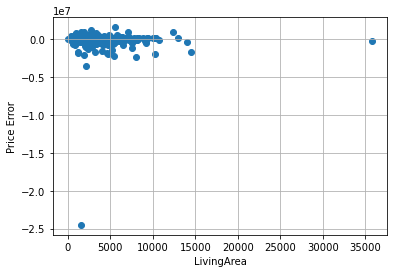

In [24]:
from matplotlib import pyplot as plt
plt.scatter(x=X['livingArea'], y=e)
plt.xlabel('LivingArea')
plt.ylabel('Price Error')
plt.grid('on')

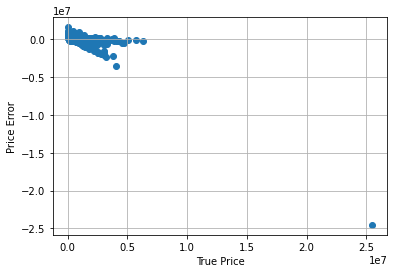

In [28]:
from matplotlib import pyplot as plt
import seaborn
plt.scatter(x=y, y=e)
plt.xlabel('True Price')
plt.ylabel('Price Error')
plt.grid('on')

Outliers are distracting our model and causing us to underestimate home prices the more expensive they are.

<AxesSubplot:>

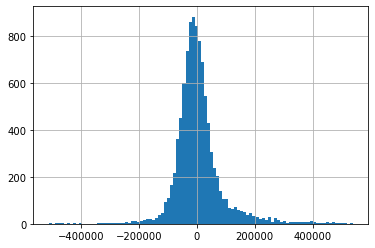

In [29]:
e_all = e
e = e_all[(e < 2*rmse) & (e > -2 * rmse )]
e.hist(bins=100)

In [30]:
df_features = df[feature_colnames].fillna(0).copy()
df_features = pd.concat([df_features, df_feature_isna], axis=1)
X = df_features
y = df[target]

model = LinearRegression()
model.fit(X=X, y=y)

y_pred = model.predict(X)
e = y_pred - y
rmse = np.sqrt(np.mean(e**2))

experiments.append(dict(
    fillna=0,
    model=model.__class__.__name__,
    numfeats=len(X.columns),
    rmse=rmse,
    ))
pd.DataFrame(experiments).round()

fillna             model  numfeats      rmse isna_features
0   mean  LinearRegression        64  275377.0           NaN
1   mean  LinearRegression       124  274313.0          True
2      0  LinearRegression       124  275578.0           NaN
3      0  LinearRegression       124  275578.0           NaN

In [32]:
experiments

[{'fillna': 'mean',
  'model': 'LinearRegression',
  'numfeats': 64,
  'rmse': 275377.0024181652},
 {'fillna': 'mean',
  'isna_features': True,
  'model': 'LinearRegression',
  'numfeats': 124,
  'rmse': 274313.2523525388},
 {'fillna': 0,
  'model': 'LinearRegression',
  'numfeats': 124,
  'rmse': 275578.16584448674},
 {'fillna': 0,
  'model': 'LinearRegression',
  'numfeats': 124,
  'rmse': 275578.16584448674},
 {'model': 'LinearRegression', 'numfeats': 124, 'rmse': 275578.16584448674}]

In [38]:
df_experiments = pd.DataFrame(experiments)
df_experiments

fillna             model  numfeats           rmse isna_features
0   mean  LinearRegression        64  275377.002418           NaN
1   mean  LinearRegression       124  274313.252353          True
2      0  LinearRegression       124  275578.165844           NaN
3      0  LinearRegression       124  275578.165844           NaN
4    NaN  LinearRegression       124  275578.165844           NaN

Is RMSE the same as Standard Deviation of the Error (Standard Error)?

In [42]:
pd.Series([rmse, e.std(), rmse - e.std()], index=' rmse, e.std(), rmse - e.std()'.split(',')).round()

 rmse              275578.0
 e.std()           275592.0
 rmse - e.std()       -14.0
dtype: float64

In [ ]:
X['livingArea_lt_20'] = x < 20
X

In [ ]:
model = LinearRegression()
model.fit(X=X, y=y)
y_pred = model.predict(X)
e = y_pred - y
rmse = np.sqrt(np.mean(e**2))
experiments.append(dict(
    model=model.__class__.__name__,
    numfeats=len(X.columns),
    rmse=rmse,
    ))
df_experiments = pd.DataFrame(experiments)
df_experiments

In [ ]:
model.coef_


In [ ]:
pd.Series(model.coef_, index=X.columns)